#### Small Image Classification using Convolutional Neural Networks

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

(50000, 32, 32, 3)

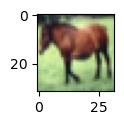

In [4]:
# Loading the Dataset and Preprocessing in same way as done in ANN project
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]

# Image plotting function
def plot_images(index, data):
    plt.figure(figsize=(10,1))
    plt.imshow(data[index])
    
plot_images(7, x_train)

# scaling the x data
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

# One Hot encoding of y data
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=len(classes), dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=len(classes), dtype='float32'
)

In [ ]:
# CNN Model
model = keras.models.Sequential([
    # cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # flatten
    keras.layers.Flatten(),
    
    # dense
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train_scaled, y_train, epochs=100)

In [ ]:
model.evaluate(x_test_scaled, y_test)

In [ ]:
classes[np.argmax(model.predict(np.expand_dims(x_test_scaled[1], axis=0)))], classes[y_test[1][0]]
y_pred = np.argmax(model.predict(x_test_scaled), axis=1)

In [ ]:
# Classification Report and Confusion Matrix
def print_report(y_test, y_pred):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
print_report(y_test, y_pred)

We have seen much better accuracy and performance using Convolutional Neural Networks (CNNs) for image classification tasks compared to Artificial Neural Networks (ANNs).